# **K - MEANS**

## Data & Import

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
df = pd.read_csv("countries.csv")

Orijinal Data : https://www.kaggle.com/datasets/fernandol/countries-of-the-world


Linkteki veriler virgülle ayrıldığı için onları noktaya çevirdim, aksi halde numpy dönüştürme işlemini yapamıyor. Link yerine benim koyduğum veri setini kullanırsanız sorun olmaz...

In [330]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA(EX.NEAREAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERNEUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERNAFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERNEUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


---
## EDA

In [331]:
df.shape

(227, 20)

In [332]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [333]:
df["Region"].unique()

array(['ASIA(EX.NEAREAST)', 'EASTERNEUROPE', 'NORTHERNAFRICA', 'OCEANIA',
       'WESTERNEUROPE', 'SUB-SAHARANAFRICA', 'LATINAMER.&CARIB',
       'C.W.OFIND.STATES', 'NEAREAST', 'NORTHERNAMERICA', 'BALTICS'],
      dtype=object)

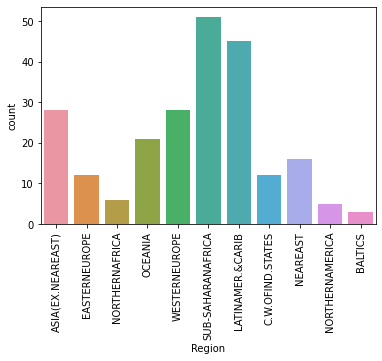

In [334]:
sns.countplot(x="Region", data=df)
plt.xticks(rotation=90);

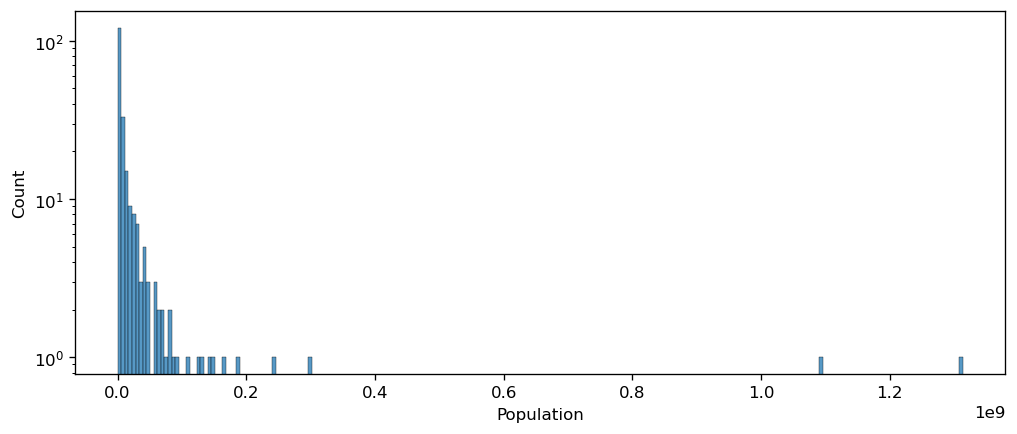

In [335]:
plt.figure(figsize=(10,4), dpi=120)
sns.histplot(x="Population", data=df);
plt.yscale("log")

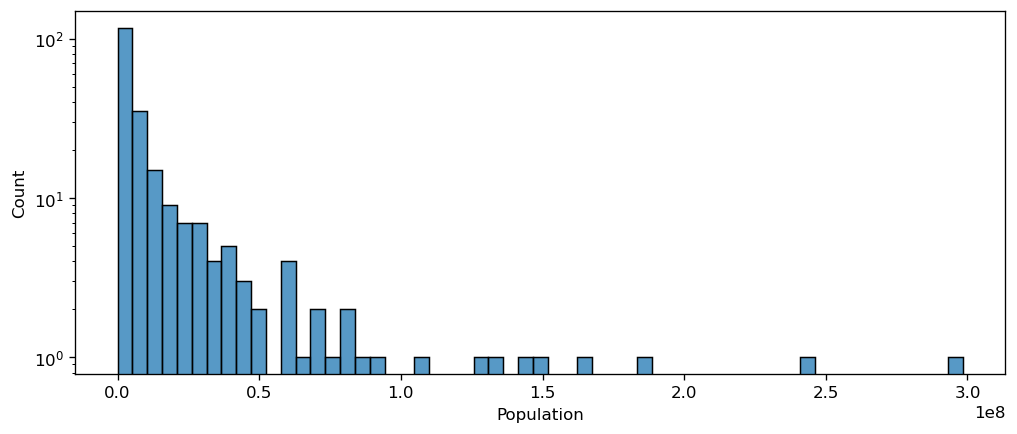

In [336]:
plt.figure(figsize=(10,4), dpi=120)
sns.histplot(x="Population", data=df[df["Population"]< 400000000]);
plt.yscale("log")

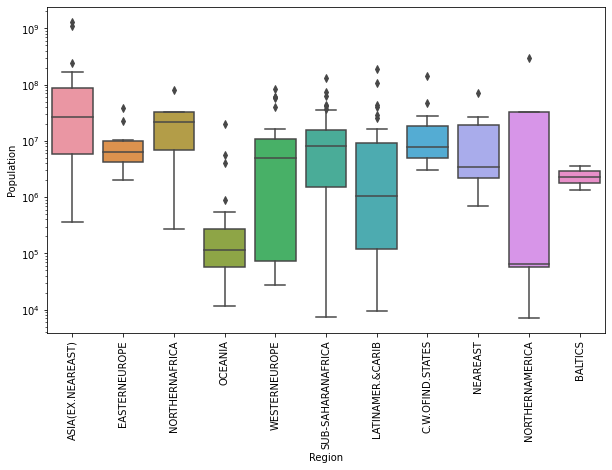

In [337]:
plt.subplots(figsize=(10,6))
sns.boxplot(x="Region", y="Population", data=df)
plt.yscale("log")
plt.xticks(rotation=90);

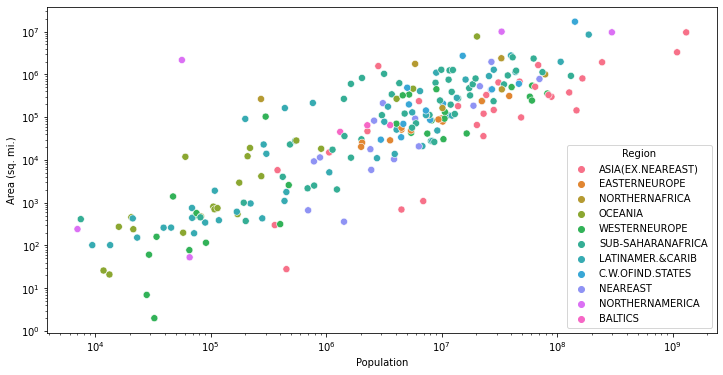

In [338]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Population',y='Area (sq. mi.)',data=df,hue='Region', s=50)
plt.yscale("log")
plt.xscale("log")

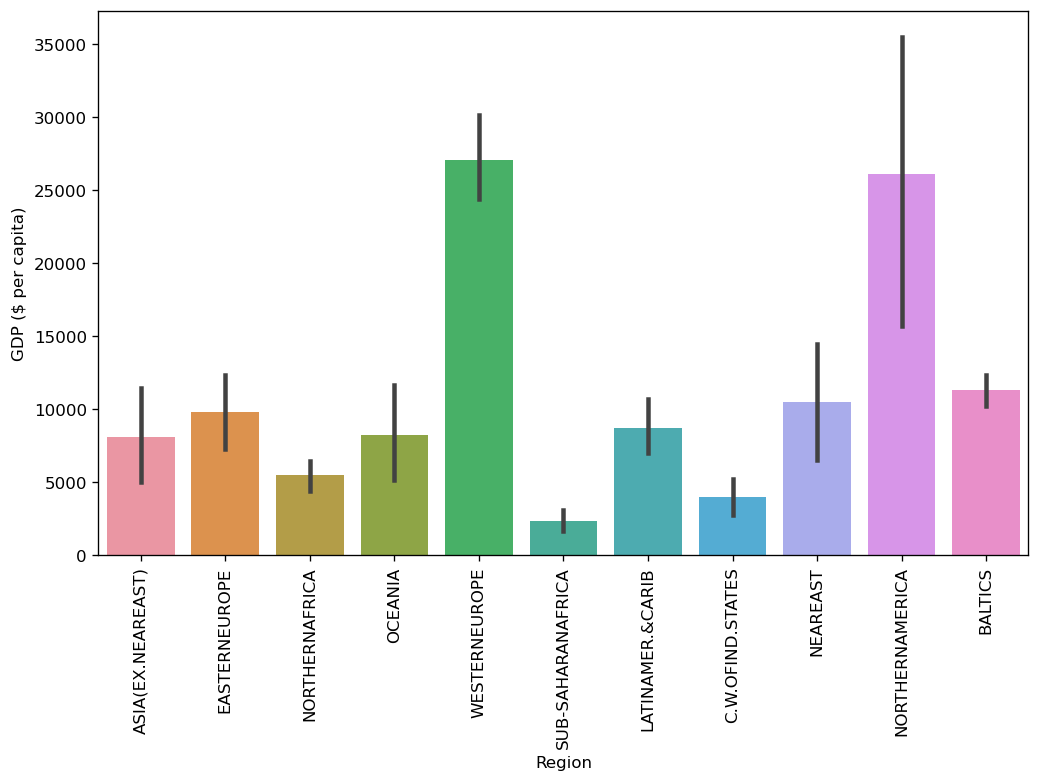

In [339]:
plt.figure(figsize=(10,6),dpi=120)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region')
plt.xticks(rotation=90);

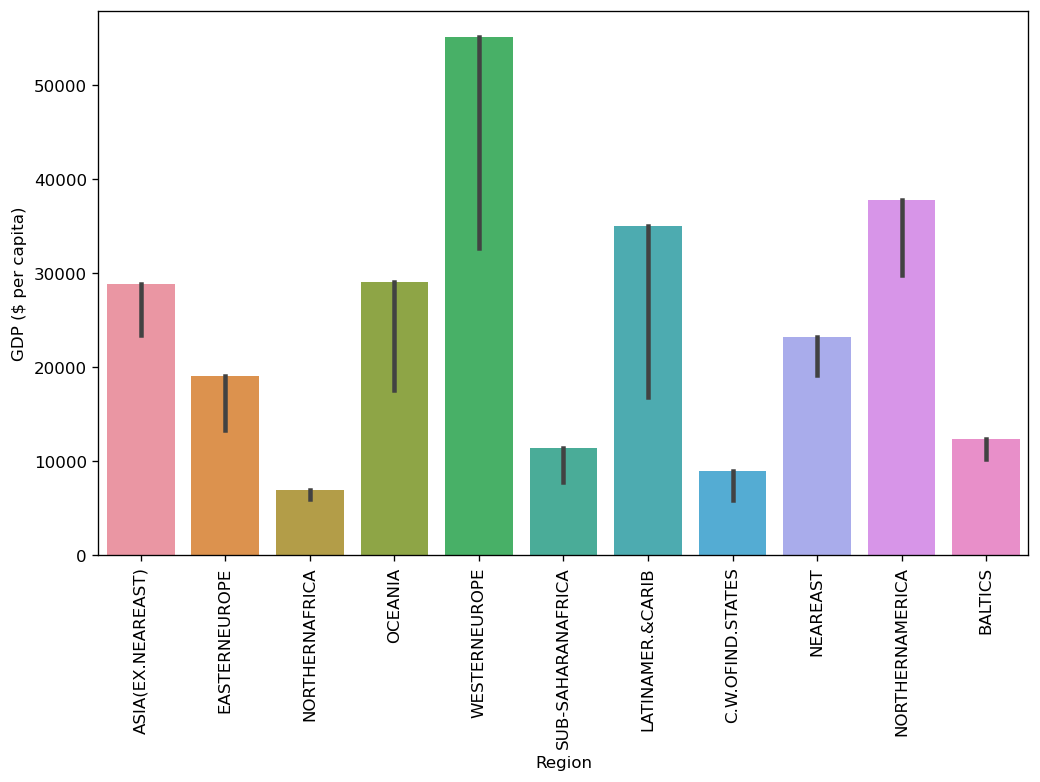

In [340]:
plt.figure(figsize=(10,6),dpi=120)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region', estimator=np.max)
plt.xticks(rotation=90);

In [341]:
# sns.pairplot(df)

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

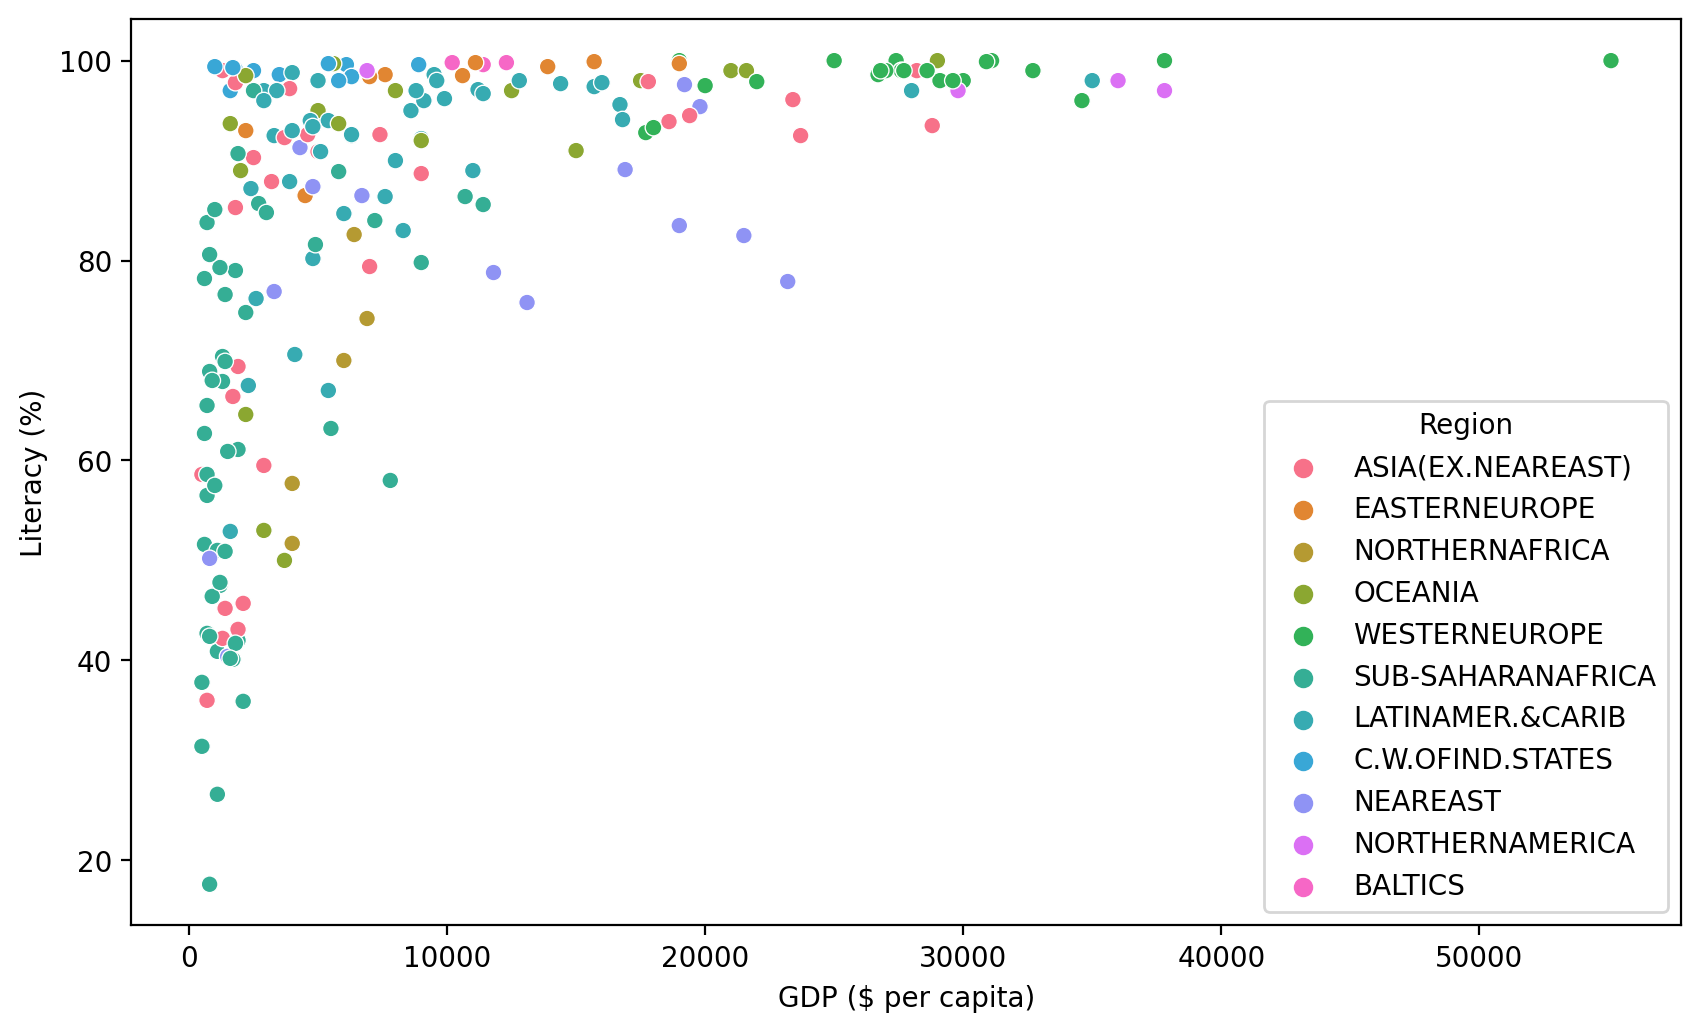

In [342]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')

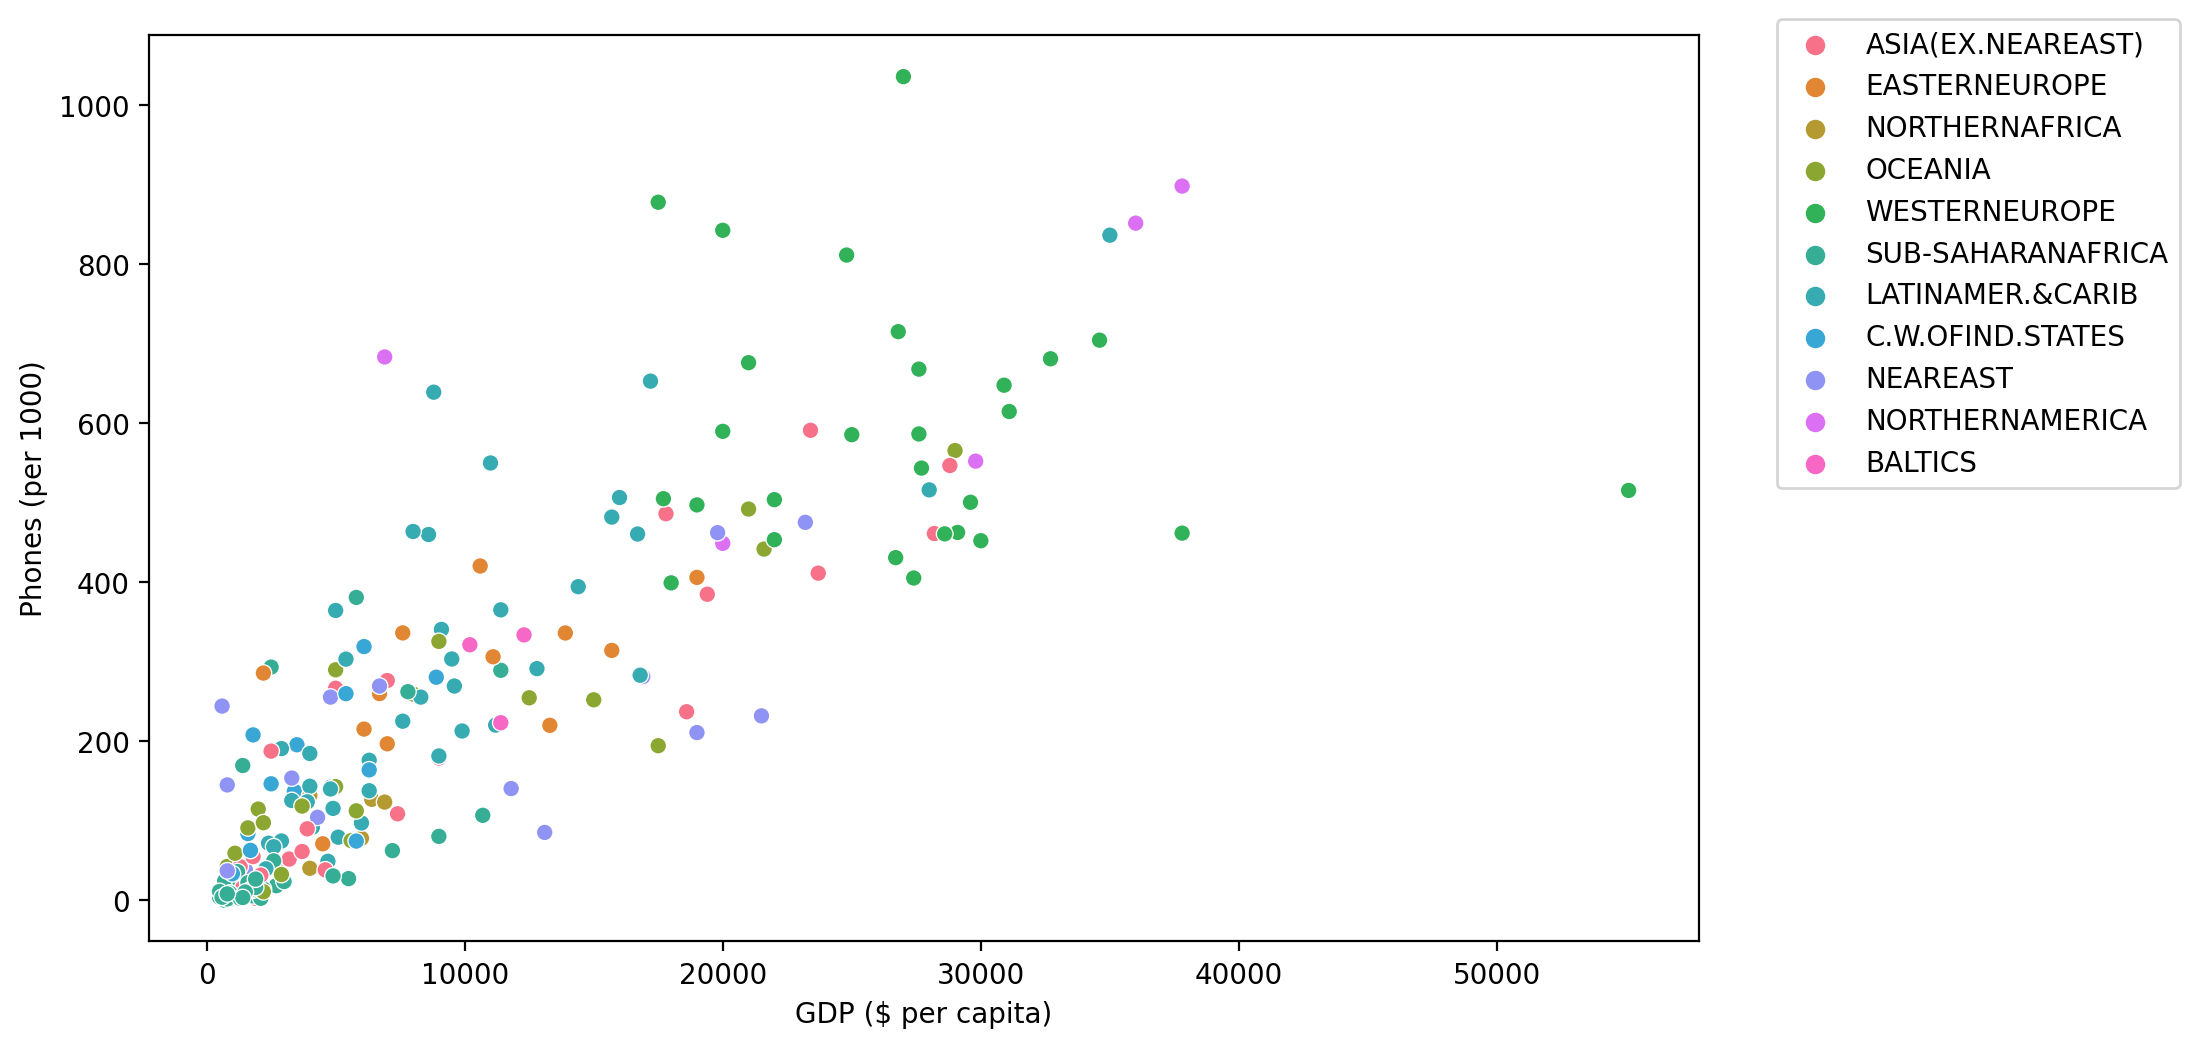

In [343]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5))

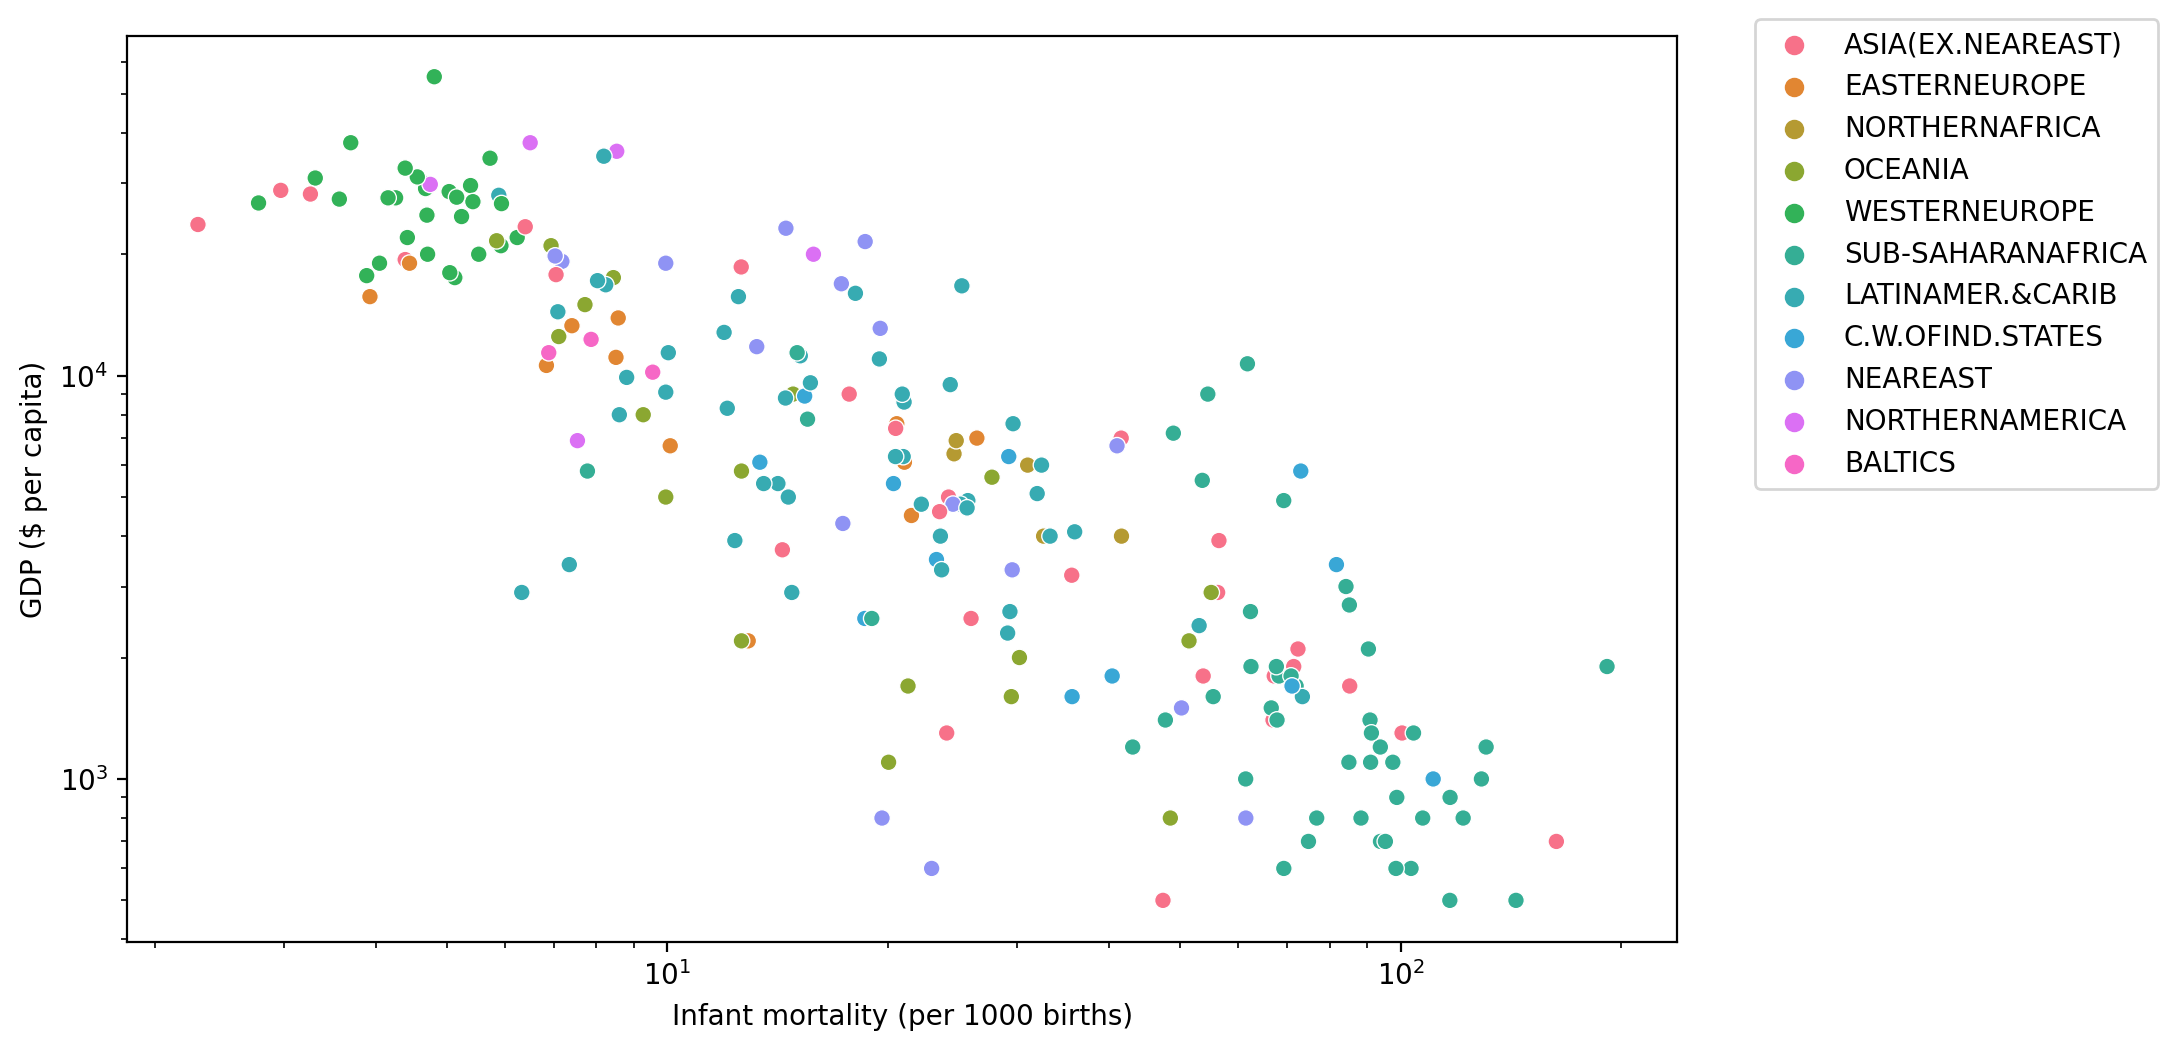

In [344]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='Infant mortality (per 1000 births)',y='GDP ($ per capita)',hue='Region')
plt.yscale("log")
plt.xscale("log")
plt.legend(loc=(1.05,0.5))

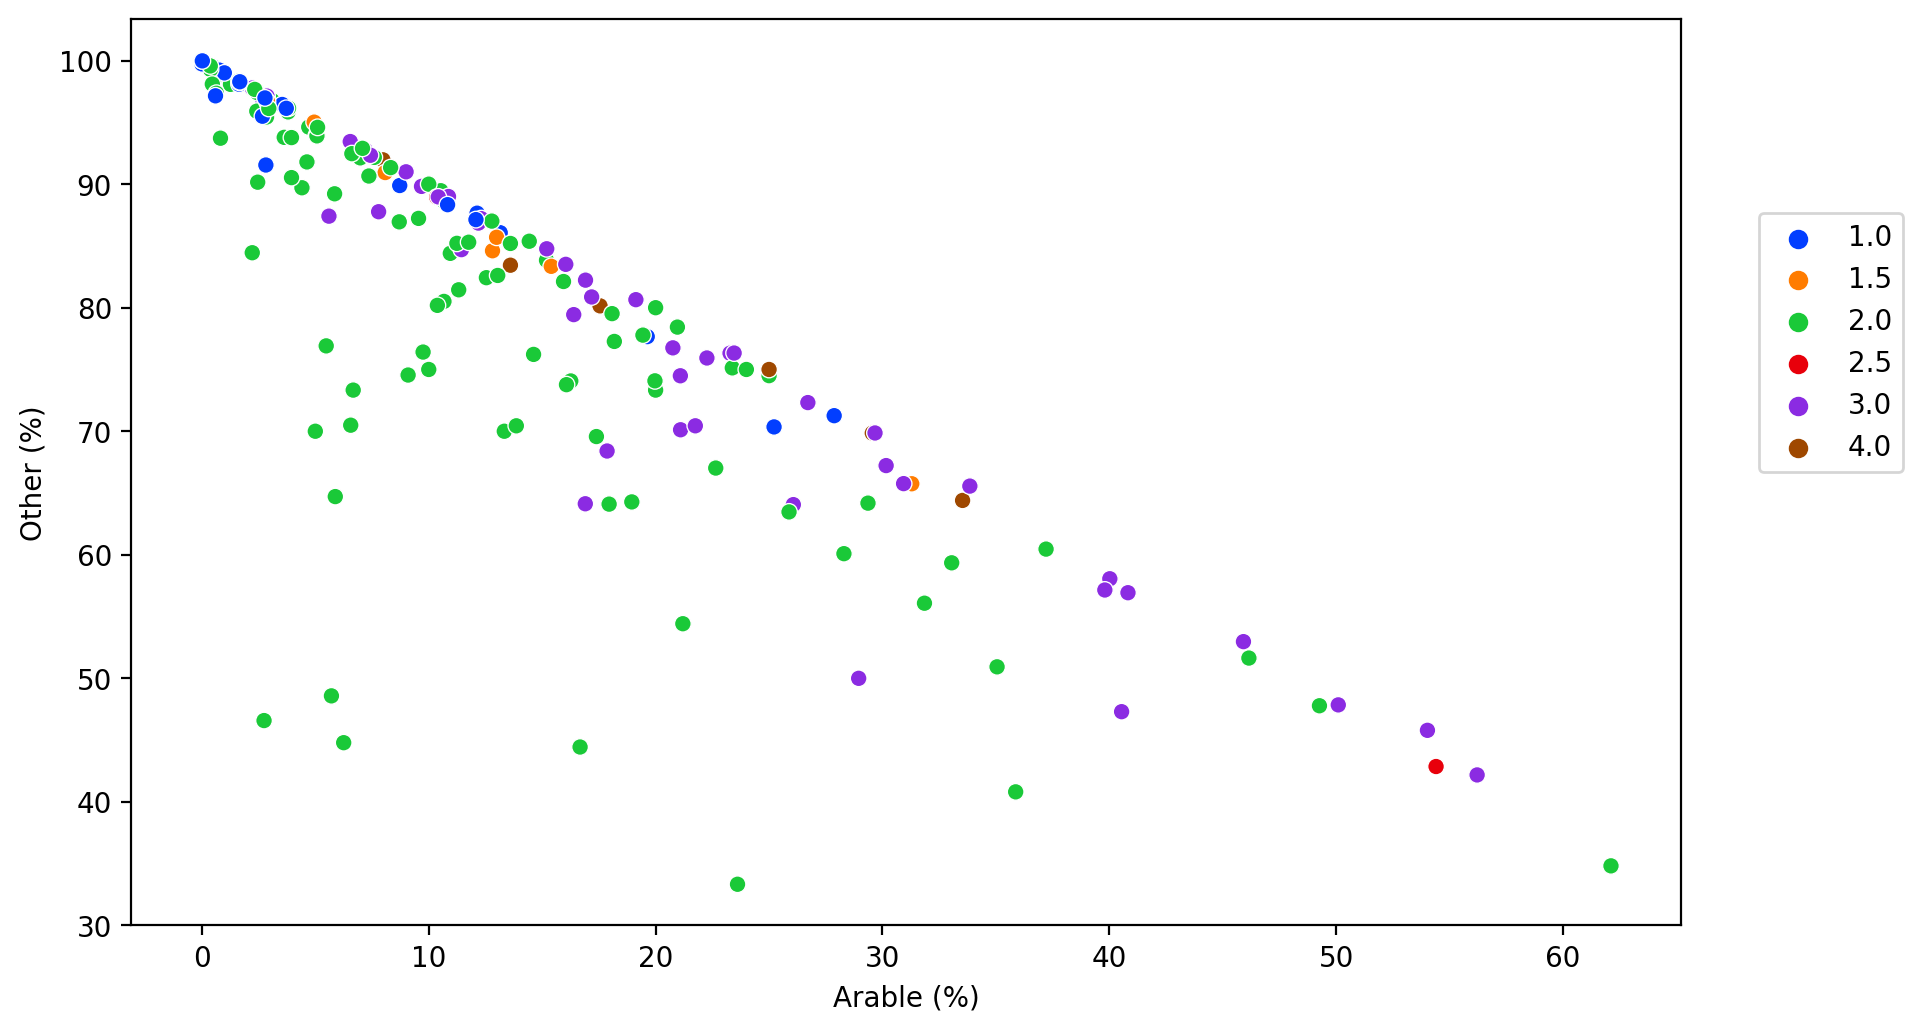

In [345]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='Arable (%)',y='Other (%)',hue='Climate', palette="bright")
plt.legend(loc=(1.05,0.5))

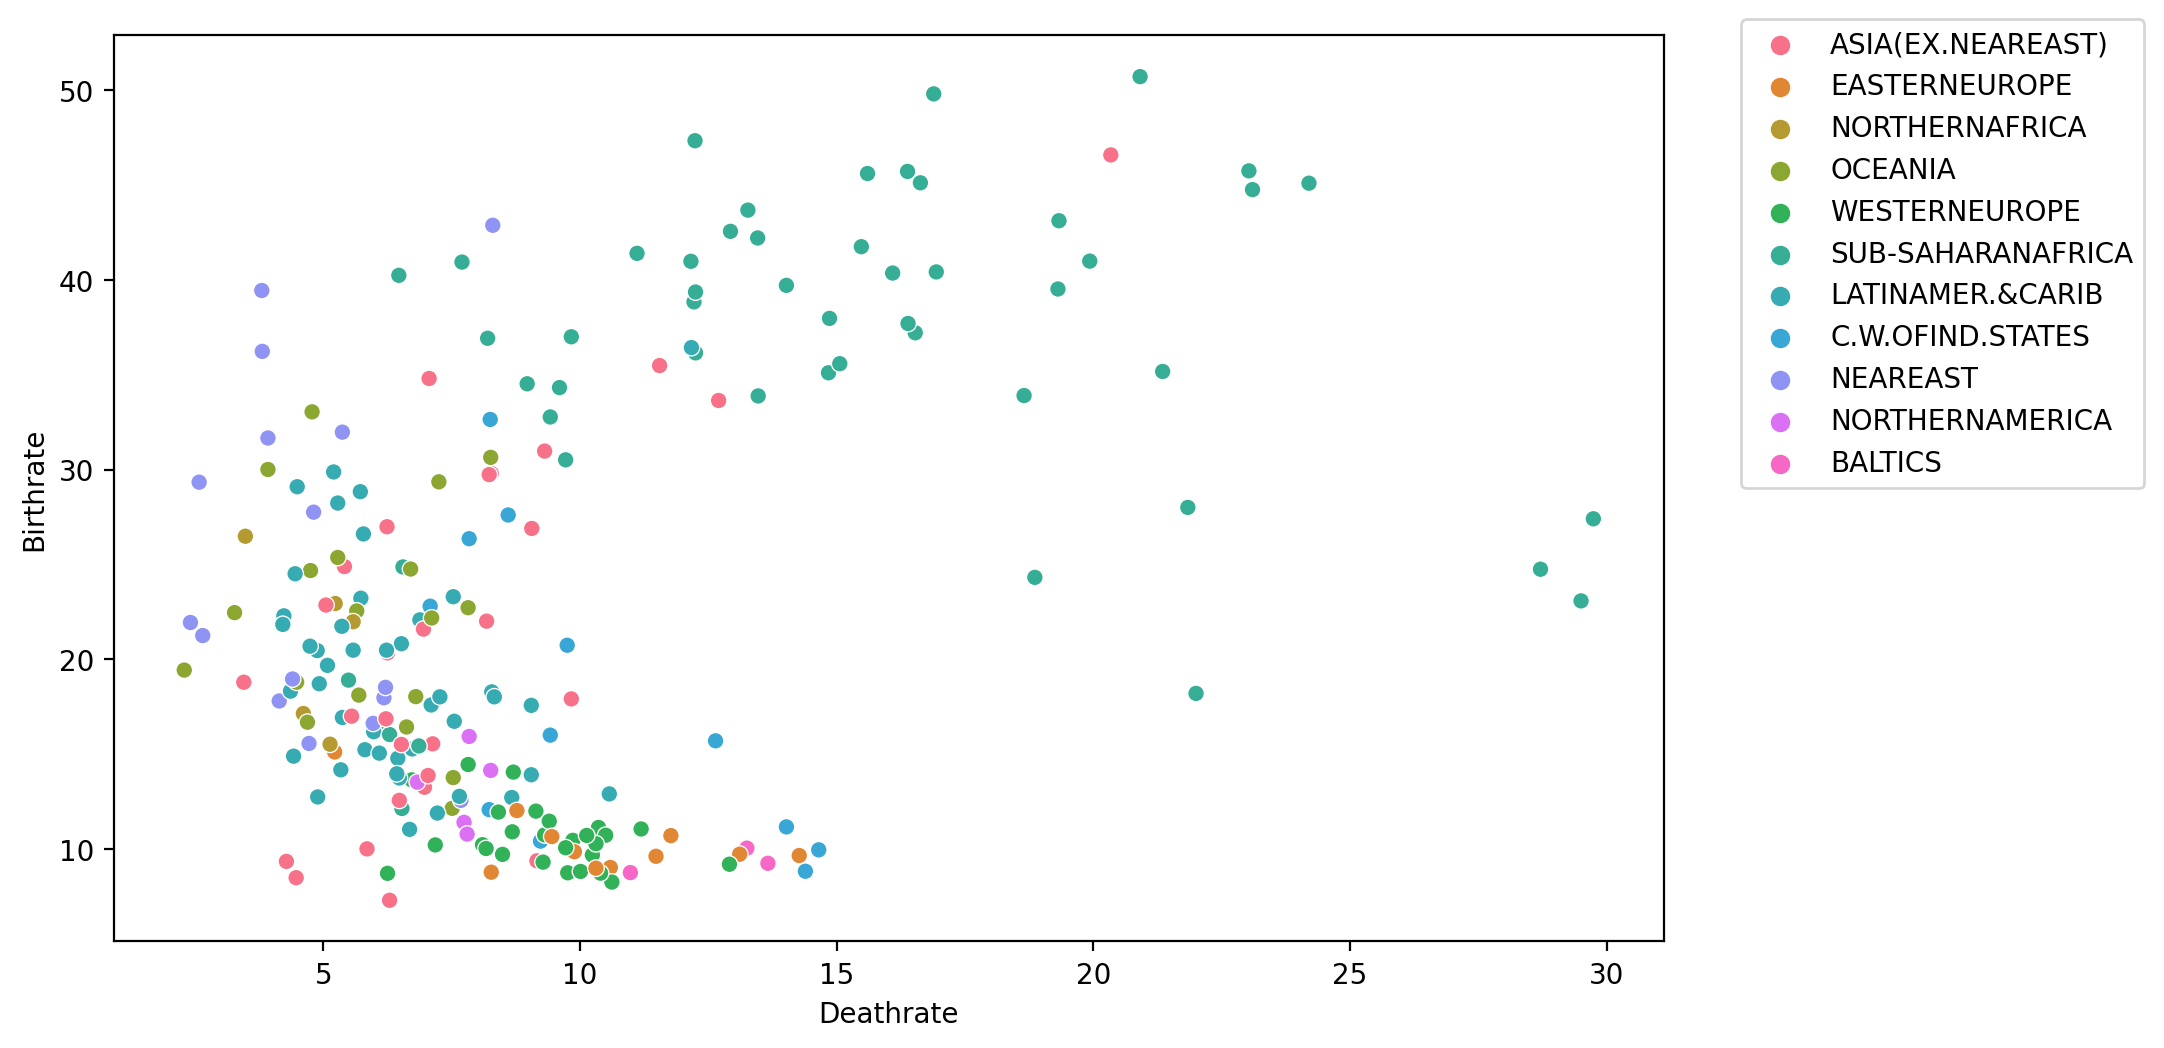

In [346]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='Deathrate',y='Birthrate',hue='Region')
plt.legend(loc=(1.05,0.5))

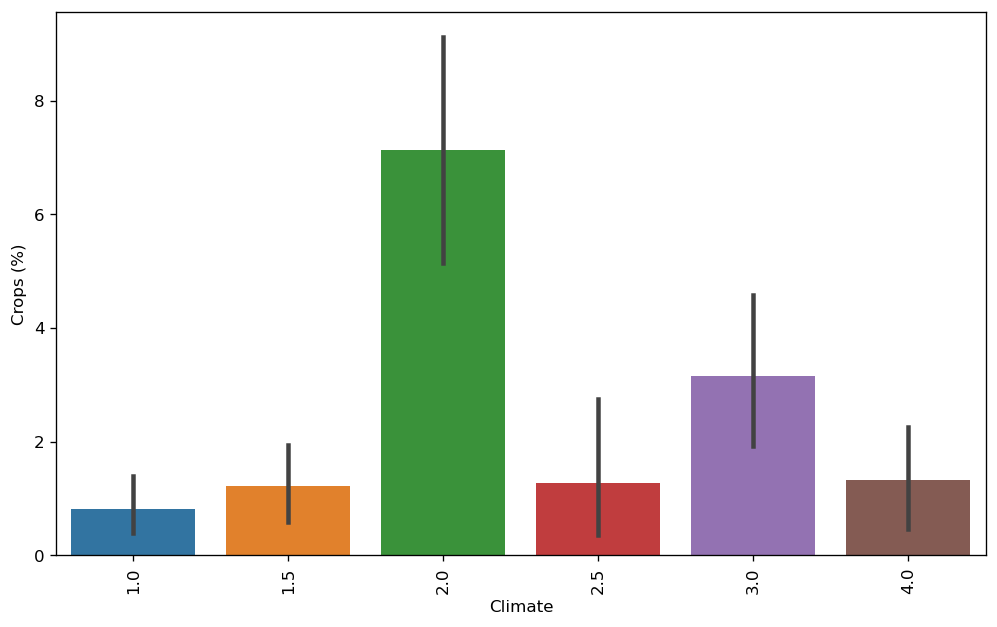

In [347]:
plt.figure(figsize=(10,6),dpi=120)
sns.barplot(data=df,x='Climate',y= "Crops (%)")
plt.xticks(rotation=90);

In [348]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.023003,-0.039324,-0.043481,-0.030819,0.188251,-0.060757,-0.120606,-0.026546,-0.045090,-0.028367,0.000376,0.099333,-0.080852
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047470,-0.007163,0.072185,0.035994,0.053403,-0.079714,-0.143916,0.138974,-0.117134,-0.066423,0.040079,-0.050640,0.121565,-0.054369
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178038,-0.144238,0.195773,0.097230,0.280172,-0.081015,-0.031661,0.081859,0.009064,-0.159192,-0.070045,-0.107142,-0.139803,0.248774
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134145,-0.136577,0.049118,0.117095,0.152129,-0.120772,0.341820,-0.079494,-0.032579,-0.075765,-0.161866,-0.030250,-0.199995,0.196528
Net migration,0.000011,0.047470,0.178038,-0.134145,1.000000,-0.025015,0.382461,-0.008761,0.239601,-0.058170,-0.347968,0.225299,-0.015170,-0.066537,0.033611,-0.116719,-0.026324,0.127134
Infant mortality (per 1000 births),0.023003,-0.007163,-0.144238,-0.136577,-0.025015,1.000000,-0.600774,-0.765536,-0.672312,-0.113859,-0.062366,0.124100,-0.374406,0.845764,0.656338,0.709475,0.003322,-0.633982
GDP ($ per capita),-0.039324,0.072185,0.195773,0.049118,0.382461,-0.600774,1.000000,0.513144,0.834499,0.019768,-0.219229,0.097828,0.340791,-0.650137,-0.201661,-0.586769,-0.028926,0.550216
Literacy (%),-0.043481,0.035994,0.097230,0.117095,-0.008761,-0.765536,0.513144,1.000000,0.601935,0.105021,0.042825,-0.107563,0.392081,-0.790846,-0.393946,-0.609638,0.064733,0.494607
Phones (per 1000),-0.030819,0.053403,0.280172,0.152129,0.239601,-0.672312,0.834499,0.601935,1.000000,0.061022,-0.152420,0.029900,0.402161,-0.724614,-0.260309,-0.601739,-0.152452,0.683934
Arable (%),0.188251,-0.079714,-0.081015,-0.120772,-0.058170,-0.113859,0.019768,0.105021,0.061022,1.000000,0.094361,-0.856763,0.380031,-0.186823,0.053472,-0.034822,-0.063618,0.091126


<AxesSubplot:>

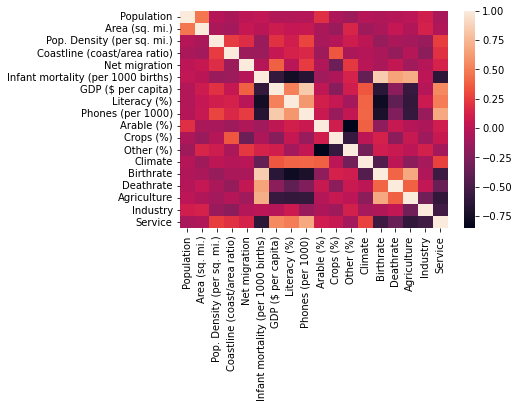

In [349]:
sns.heatmap(df.corr())

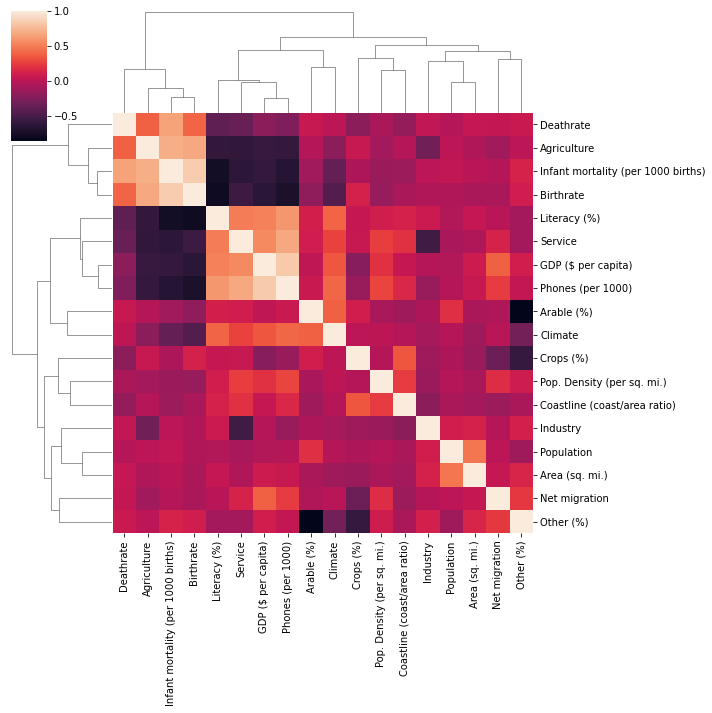

In [350]:
sns.clustermap(df.corr())

---
## Eksik & Hatalı Veriler

In [351]:
print("Toplam Boş:", df.isna().sum().sum())
df.isna().sum()

Toplam Boş: 110


Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [352]:
df[df['Agriculture'].isnull()]['Country']
# Bu ülkeler küçük ada ülkeleri, Batı Sahra ve Grönland olduğu için tarım verisini 0 olarak girmek verilerde çok büyük bir değişiklik oluşturmaz.

3            American Samoa 
4                   Andorra 
78                Gibraltar 
80                Greenland 
83                     Guam 
134                 Mayotte 
140              Montserrat 
144                   Nauru 
153      N. Mariana Islands 
171            Saint Helena 
174    St Pierre & Miquelon 
177              San Marino 
208       Turks & Caicos Is 
221       Wallis and Futuna 
223          Western Sahara 
Name: Country, dtype: object

In [353]:
df[df["Agriculture"].isna()] = df[df["Agriculture"].isna()].fillna(0)
# df[df["Agriculture"].isna()]  Bu şekilde yazmak önemli

In [354]:
print("Toplam Boş:", df.isna().sum().sum())
df.isna().sum()
# Yukarıdaki minik 15 ülkeye ait NaN veriler 0 ile dolduruldu

Toplam Boş: 43


Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

Sonraki işlemi daha detaylı anlamak için 

[BURAYA](https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group#:~:text=This%20seems%20intuitive)

[VEYA BURAYA](https://www.makeuseof.com/fill-missing-data-with-pandas/#:~:text=df.fillna(%7B%22A%22%3Adf%5B%27A%27%5D.mean()%2C%20%0A%20%22B%22%3A%20df%5B%27B%27%5D.median()%2C%20%0A%20%22C%22%3A%20df%5B%27C%27%5D.mode()%5B0%5D%7D%2C%20%0A%20inplace%3DTrue))

[YADA BURAYA](https://www.geeksforgeeks.org/how-to-fill-nan-values-with-mean-in-pandas/#:~:text=Output%3A-,Example%202%3A,-Python3) Tıklayabilirsin


In [355]:
df[df["Literacy (%)"].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERNEUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERNEUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAREAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.0,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERNEUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.0,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERNEUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.0,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERNEUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.0,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.0,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERNEUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
185,Slovakia,EASTERNEUROPE,5439448,48845,111.4,0.00,0.30,7.41,13300.0,NaN,220.1,30.16,2.62,67.22,3.0,10.65,9.45,0.035,0.294,0.672
187,Solomon Islands,OCEANIA,552438,28450,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.0,30.01,3.92,0.420,0.110,0.470


In [356]:
df.groupby("Region")["Literacy (%)"].mean().sort_values(ascending=False)

Region
BALTICS              99.733333
C.W.OFIND.STATES     98.725000
EASTERNEUROPE        97.088889
WESTERNEUROPE        94.291667
LATINAMER.&CARIB     90.654545
OCEANIA              83.900000
ASIA(EX.NEAREAST)    79.553571
NEAREAST             79.521429
NORTHERNAMERICA      78.200000
SUB-SAHARANAFRICA    61.284314
NORTHERNAFRICA       56.033333
Name: Literacy (%), dtype: float64

In [357]:
df["Literacy (%)"] = df["Literacy (%)"].fillna(df.groupby("Region")["Literacy (%)"].transform("mean"))

In [358]:
df[df["Literacy (%)"].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [359]:
df.iloc[99]["Literacy (%)"]

94.29166666666667

In [360]:
print("Toplam Boş:", df.isna().sum().sum())
df.isna().sum()

Toplam Boş: 30


Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                           0
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [361]:
df["Climate"] = df["Climate"].fillna(df.groupby("Region")["Climate"].transform("mean"))

In [362]:
print("Toplam Boş:", df.isna().sum().sum())
df.isna().sum()

Toplam Boş: 12


Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [363]:
df[df.isnull().any(axis=1)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.000000,289.9,17.39,13.04,69.57,2.000000,21.00,NaN,0.151,0.096,0.753
52,Cyprus,NEAREAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.600000,NaN,7.79,4.44,87.77,3.000000,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA(EX.NEAREAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.600000,NaN,4.71,0.67,94.62,2.000000,26.99,6.24,0.085,0.231,0.684
85,Guernsey,WESTERNEUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,94.291667,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
138,Monaco,WESTERNEUROPE,32543,2,16271.5,205.00,7.75,5.43,27000.0,99.000000,1035.6,0.00,0.00,100.00,2.826087,9.19,12.91,0.170,NaN,NaN
181,Serbia,EASTERNEUROPE,9396411,88361,106.3,0.00,-1.33,12.89,2200.0,93.000000,285.8,33.35,3.20,63.45,3.111111,NaN,NaN,0.166,0.255,0.579


In [364]:
df = df.fillna(df.groupby("Region").transform("mean"))

# Her kolonun adını tek tek girip düzeltmemizi istiyor bu sebeple bu şekilde bir hata ile karşılaşıyoruz
# Burada bir for döngüsü oluşturarak verilen hatadan kurtulmak mümkün.
# Ya da kolaylık olması açısından bu ülkeleri .dropna() ile düşürmek de mümkün.

C:\Users\mbatu\AppData\Local\Temp\ipykernel_13348\517272614.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.



In [365]:
print("Toplam Boş:", df.isna().sum().sum())
df.isna().sum()

Toplam Boş: 0


Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

---
## Veriyi Model İçin Hazırlamak

In [366]:
X = df.drop("Country", axis=1)
# y yok çünkü eğitmek için kullanacağımız bir parametre ..
# ve eğitim sonunda karşılaştıracağımız bir test seti mevcut değil

In [367]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W.OFIND.STATES,Region_EASTERNEUROPE,Region_LATINAMER.&CARIB,Region_NEAREAST,Region_NORTHERNAFRICA,Region_NORTHERNAMERICA,Region_OCEANIA,Region_SUB-SAHARANAFRICA,Region_WESTERNEUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [368]:
from sklearn.preprocessing import StandardScaler
# Veriler arasındaki farkalr çok büyük olmak için ölçeklemek çokomelli...

In [369]:
scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[ 0.01969468,  0.02758332, -0.19984434, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [-0.21387688, -0.31879748, -0.15360296, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.31928318,
        -0.53830542, -0.37510468],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [-0.14654488,  0.08642673, -0.21958445, ..., -0.31928318,
         1.85768146, -0.37510468],
       [-0.14029829, -0.11624192, -0.20992568, ..., -0.31928318,
         1.85768146, -0.37510468]])

In [370]:
pd.DataFrame(scaled_X)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.019695,0.027583,-0.199844,-0.293443,4.750812,3.629803,-0.892453,-2.009534,-1.016724,-0.124743,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.022937,-0.385888,-0.513413,0.224607,-0.716619,0.565132,...,-0.115728,-0.23625,4.232808,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
2,0.035618,0.998421,-0.220490,-0.292889,-0.086430,-0.116946,-0.363792,-0.505360,-0.686168,-0.810769,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,6.069047,-0.150075,-0.319283,-0.538305,-0.375105
3,-0.243834,-0.334779,-0.053514,0.514709,-4.278020,-0.733414,-0.164297,0.689131,0.114406,-0.288743,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,3.132016,-0.538305,-0.375105
4,-0.243720,-0.334629,-0.137002,-0.293443,1.355460,-0.881502,0.932923,0.821852,1.163449,-0.887764,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,2.665923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,-0.223408,-0.331610,0.024662,-0.293443,0.608730,-0.439790,-0.882478,-0.084128,-0.390035,0.242523,...,-0.115728,-0.23625,-0.236250,-0.497245,3.631460,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
223,-0.242004,-0.185982,-0.228217,-0.287620,-0.005982,-0.996398,-0.962276,-3.602188,-1.030847,-1.057153,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,6.069047,-0.150075,-0.319283,-0.538305,-0.375105
224,-0.061923,-0.039330,-0.204312,-0.288452,-0.005982,0.748321,-0.882478,-1.381320,-0.866672,-0.844646,...,-0.115728,-0.23625,-0.236250,-0.497245,3.631460,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
225,-0.146545,0.086427,-0.219584,-0.293443,-0.005982,1.508338,-0.882478,-0.036412,-0.994658,-0.513568,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,1.857681,-0.375105


---
## K - Means Model

In [371]:
from sklearn.cluster import KMeans

In [372]:
ssd = []

for k in range(2,50):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)

    ssd.append(model.inertia_)

Text(0, 0.5, 'Noktalar Arası Mesafelerin\n Karelerinin Toplamı')

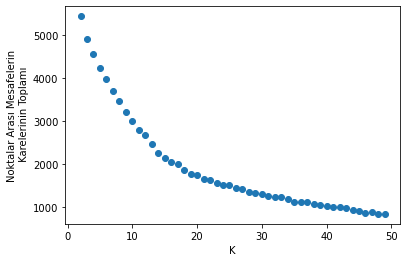

In [373]:
plt.plot(range(2,50), ssd, "o")
plt.xlabel("K")
plt.ylabel("Noktalar Arası Mesafelerin\n Karelerinin Toplamı")

In [374]:
ssd_seri = pd.Series(ssd)

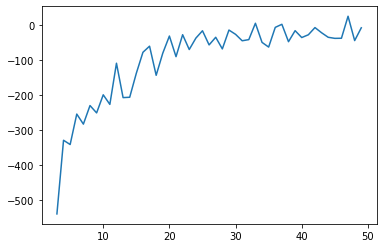

In [375]:
plt.plot(range(2,50), ssd_seri.diff())

<BarContainer object of 48 artists>

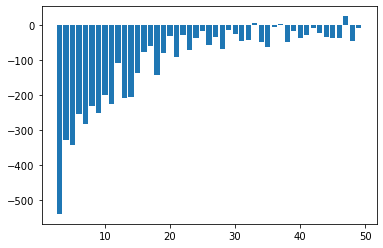

In [376]:
plt.bar(range(2,50), ssd_seri.diff())

---
## Modelin Değerlendirmesi

Öncelikle belirtmek gerekir ki modelimizin doğru veya yanlış olduğu ile alakalı bir parametremiz olmadığı için burada yorumlamak sizin inisiyatifinize kalmış

Biz burada ülkeleri 2 gruptan başlayarak 49 gruba kadar ayırdık. Peki 35 gruba ayrılması bizim için ne ifade ediyor? Buna siz karar vereceksiniz

Ben bu noktada Dünya Bankasının ülkeleri ayrıştırmak için kullandığı yöneteme benzer bir şeyler yapacağım.
[Detaylı bilgi için](https://en.wikipedia.org/wiki/Developing_country#:~:text=of%20the%20countries.-,The%20World%20Bank%20classifies%20the%20world%27s%20economies%20into%20four%20groups%2C%20based,small%20island%20developing%20states%20are%20all%20sub%2Dgroupings%20of%20developing%20countries.,-Countries%20on%20the)

In [377]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [378]:
model.labels_

array([0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0,
       2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1,
       0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0])

In [379]:
X['4 Clusters'] = model.labels_

In [380]:
X.corr()['4 Clusters'].sort_values()

Birthrate                            -0.815245
Infant mortality (per 1000 births)   -0.785528
Region_SUB-SAHARANAFRICA             -0.675896
Agriculture                          -0.611554
Deathrate                            -0.425893
Other (%)                            -0.122853
Crops (%)                            -0.044733
Industry                             -0.027614
Area (sq. mi.)                       -0.015887
Population                           -0.012403
Region_NORTHERNAFRICA                -0.006150
Region_OCEANIA                        0.009552
Region_NEAREAST                       0.014025
Region_LATINAMER.&CARIB               0.028251
Region_C.W.OFIND.STATES               0.046783
Coastline (coast/area ratio)          0.086842
Region_NORTHERNAMERICA                0.121550
Region_BALTICS                        0.159098
Net migration                         0.164513
Pop. Density (per sq. mi.)            0.190075
Arable (%)                            0.237848
Region_EASTER

c:\Users\mbatu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



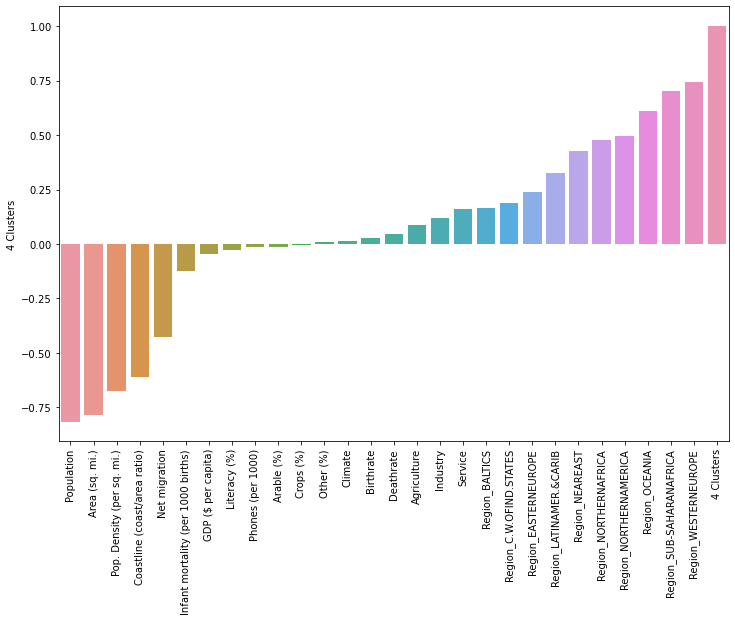

In [381]:
plt.figure(figsize=(12,8))
sns.barplot(X.columns, X.corr()["4 Clusters"].sort_values())
plt.xticks(rotation=90);

---
## Harita Üzerinde Gösterim

In [382]:
iso_df = pd.read_csv("iso.csv")

In [383]:
iso_df

,ISO Codes
0,AFG
1,ALB
2,DZA
3,ASM
4,AND
...,...
222,NaN
223,NaN
224,YEM
225,ZMB


In [384]:
df = pd.concat([df,iso_df], axis=1)

In [385]:
model = KMeans(n_clusters=4, random_state=9)
    
model.fit(scaled_X)

KMeans(n_clusters=4, random_state=9)

In [386]:
df['Cluster'] = model.labels_

In [389]:
df.iloc[65:80]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO Codes,Cluster
65,Ethiopia,SUB-SAHARANAFRICA,74777981,1127127,66.3,0.00,0.00,95.32,700.0,42.700000,...,0.75,88.54,2.000000,37.98,14.86,0.475,0.099,0.426,ETH,2
66,Faroe Islands,WESTERNEUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,94.291667,...,0.00,97.86,2.826087,14.05,8.70,0.270,0.110,0.620,NaN,1
67,Fiji,OCEANIA,905949,18270,49.6,6.18,-3.14,12.62,5800.0,93.700000,...,4.65,84.40,2.000000,22.55,5.65,0.089,0.135,0.776,FJI,0
68,Finland,WESTERNEUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.000000,...,0.03,92.78,3.000000,10.45,9.86,0.028,0.295,0.676,FIN,1
69,France,WESTERNEUROPE,60876136,547030,111.3,0.63,0.66,4.26,27600.0,99.000000,...,2.07,64.40,4.000000,11.99,9.14,0.022,0.214,0.764,FRA,1
70,French Guiana,LATINAMER.&CARIB,199509,91000,2.2,0.42,6.27,12.07,8300.0,83.000000,...,0.05,99.81,2.000000,20.46,4.88,0.066,0.156,0.778,GUF,3
71,French Polynesia,OCEANIA,274578,4167,65.9,60.60,2.94,8.44,17500.0,98.000000,...,5.46,93.72,2.000000,16.68,4.69,0.031,0.190,0.769,PYF,0
72,Gabon,SUB-SAHARANAFRICA,1424906,267667,5.3,0.33,0.00,53.64,5500.0,63.200000,...,0.66,98.08,2.000000,36.16,12.25,0.061,0.592,0.348,GAB,2
73,"Gambia, The",SUB-SAHARANAFRICA,1641564,11300,145.3,0.71,1.57,72.02,1700.0,40.100000,...,0.50,74.50,2.000000,39.37,12.25,0.308,0.142,0.549,NaN,2
74,Gaza Strip,NEAREAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,79.521429,...,21.05,50.00,3.000000,39.45,3.80,0.030,0.283,0.687,NaN,3


In [388]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Codes",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()